# Comparison of Sieve Of Eratosthenes vs Brute-force
### by Mikhail Pisman
##### *Goal: Find out which method is more efficient in finding prime numbers*


First let's import necessary libraries and both functions

In [1]:
import pandas as pd
import time
import numpy as np

from bruteforce import Bruteforce
from sieve_of_eratosthenes import SieveOfEratosthenes

Here is ```Bruteforce``` function. It simply iterates through the range of numbers bellow ```n``` and finds all prime numbers. For each number, we check if division by any number bellow the original number will result in zero remainder. Prime numbers won't have any numbers, besides themselve.
```
def Bruteforce(n):
    def IsPrime(x):
        for i in range(2, x):
            if x % i == 0:
                return False
        return True

    for i in range(2, n + 1):
        if IsPrime(i):
```
Here is ```SieveOfEratosthenes``` function. In cotrast, it's more efficient. We create a boolean list size of ```n``` filled with ```True``` values, then "removing"(*switching value to ```False```*) for every multiple of number in the list.
```
def SieveOfEratosthenes(n):
    
    prime = [True for i in range(n + 1)]
    p = 2

    while (p * p <= n):
        if (prime[p] == True):
            for i in range(p * 2, n + 1, p):
                prime[i] = False
        p += 1

    prime[0]= False
    prime[1]= False

    for p in range(n + 1):
        if prime[p]:
            yield p
```

#### Bellow you can see test runs of both functions.

### First, we will print all prime numbers bellow 3000 using Sieve Of Eratosthenes

In [23]:
start_time = time.time()
for i in SieveOfEratosthenes(3000):
    print(i, end=", ")
print("\n\nExecuted in", round(time.time() - start_time, 4), "seconds")

2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 122

#### As you can see, the programm succesfuly printed all numbers in 0.0206 seconds

### Now, let's see how the Brute-force method will do the same job.

In [24]:
start_time = time.time()
for i in Bruteforce(3000):
    print(i, end=", ")
print("\nExecuted in", round(time.time() - start_time, 4), "seconds")

2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 122

#### Brute-force succefully returned all prime numbers in 0.073 seconds.

### Now let's create a Dataframe with two columns and populate it with different tests of numbers from 100 to 10000 increasing exponentialy. 

In [4]:
result1 = []
result2 = []
index = [round(100**i) for i in np.arange(1, 2.1, 0.02)]
for n in index:
    start_time = time.time()
    for i in Bruteforce(n):
        pass
    result1.append(time.time() - start_time)
    
    start_time = time.time()
    for i in SieveOfEratosthenes(n):
        pass
    result2.append(time.time() - start_time)

In [5]:
df = pd.DataFrame(list(zip(result1, result2)), index=index, columns =['Brute-force', 'Sieve Of Eratosthenes']) 

### Here you can see the Dataframe, where index is the maximum value of the prime number.

In [10]:
df

,Brute-force,Sieve Of Eratosthenes
100,0.000114,0.000021
110,0.000092,0.000015
120,0.000099,0.000016
132,0.000114,0.000020
145,0.000134,0.000022
...,...,...
10000,0.392116,0.001513
10965,0.449449,0.001840
12023,0.526239,0.002138
13183,0.628367,0.002212


### Now we can plot the Data to visualize the results.
Using logarithmic scaling, we can see gradual increase for both functions

<AxesSubplot:xlabel='Max number', ylabel='Time in seconds'>

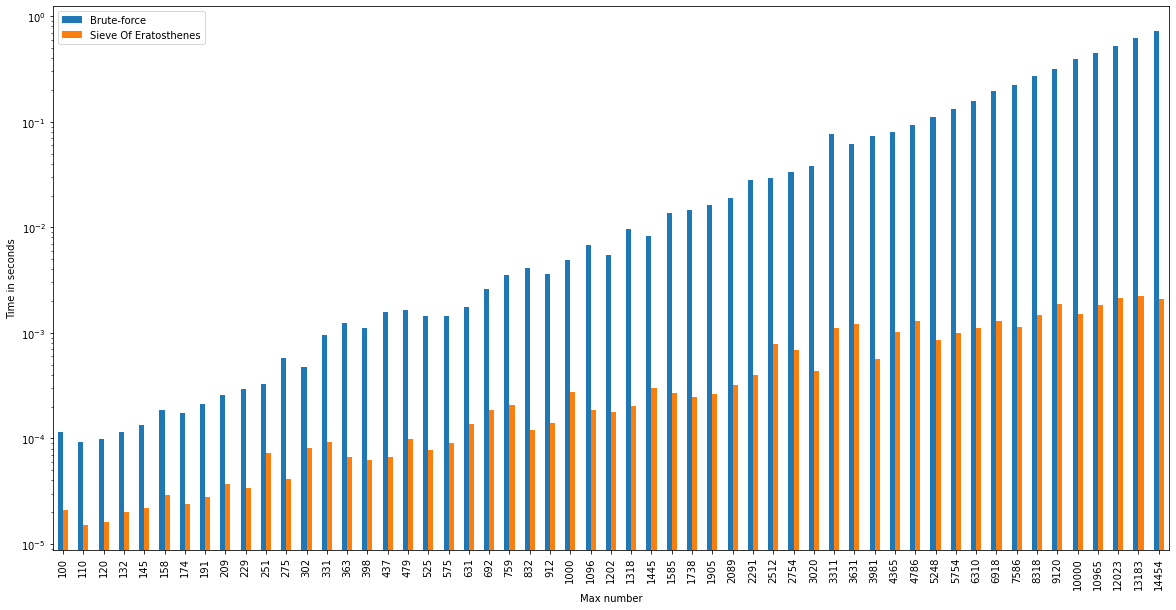

In [7]:
df.plot(kind='bar', logy=True, xlabel="Max number", ylabel="Time in seconds", figsize=(20,10))

### However, without the scaling it is obvoious that **Sieve Of Eratosthenes** significcantly outperformes **Brute-force** method 

<AxesSubplot:xlabel='Max number', ylabel='Time in seconds'>

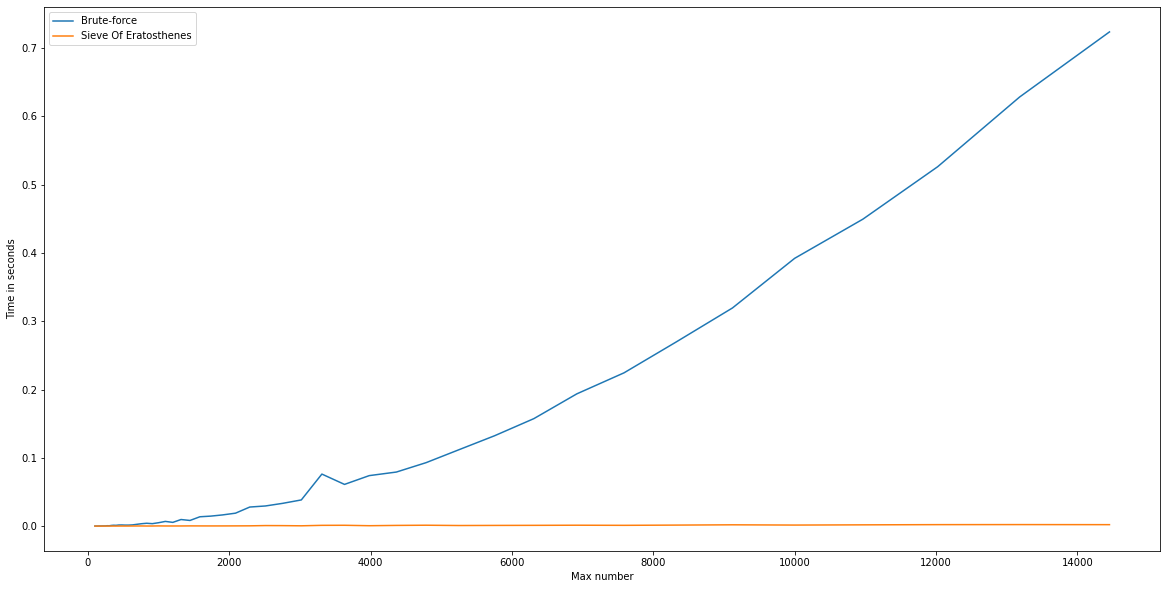

In [8]:
df.plot(xlabel="Max number", ylabel="Time in seconds", figsize=(20,10))